In [97]:
import pandas as pd
import numpy as np
from pprint import pprint
import codecs
import json
import glob
from os import listdir
from os.path import isfile, join
from sklearn.feature_extraction.text import TfidfTransformer, TfidfVectorizer, CountVectorizer
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt
import re

pd.set_option('display.max_columns', None) #отображения всех столбцов


In [98]:
file = [f for f in listdir('DataVariant1') if isfile(join('DataVariant1', f))] #список файлов в директории 
file

['Гэллэри Сервис.json',
 'ESforce Holding.json',
 'Target.json',
 'skillbox.json',
 'Goose Gaming.json',
 'Промобот.json',
 'Здоровье.ру.json',
 'Студия Артемия Лебедева.json',
 'Федерация креативных индустрий.json',
 'Vinci Agency.json',
 'Gett.json',
 'Cybersport.Metaratings.json',
 'Иннотех.json',
 'Проект по использованию технологий компьютерного зрения на базе искусственного интеллекта для анализа медицинских изображений.json',
 'MMA.Metaratings.json']

In [66]:
company = pd.DataFrame(columns=['Title', 'Day', 'Month', 'Time', 'Rate', 'View', 'Firm'])

company1 = pd.DataFrame(columns=['Rate', 'View', 'Category', 'Firm']) # дополнительные данные о компаниях

In [67]:
for a in file: # Считываем файлы
    try:
        df = json.load(open('DataVariant1//' + a, encoding='utf-8'))['refs']
        for result in df:
            try:
                company.loc[len(company.index)] = [result[0], result[1]['day'], result[1]['month'], result[1]['time'], result[2]['rate'], result[2]['views'], a.removesuffix('.json')]
            except: # Обработка исключений
                print('')
    except: # Обработка исключений
        print(a)

Target.json


In [68]:
ff = company[company['Day'].notna()]

In [69]:
for a in file: #Пробегаемся по файлам
    try:
        df = json.load(open('DataVariant1//' + a, encoding='utf-8'))['info'] #открываем и извлекаем данные
        company1.loc[len(company1.index)] = [df['rate'], df['subs'], df['industries'], a.removesuffix('.json')] #добавляем данные
    except: # Обработка исключений
        print(a)

Гэллэри Сервис.json
ESforce Holding.json
Target.json
Goose Gaming.json
Промобот.json
Здоровье.ру.json
Студия Артемия Лебедева.json
Федерация креативных индустрий.json
Vinci Agency.json
Gett.json
Cybersport.Metaratings.json
Проект по использованию технологий компьютерного зрения на базе искусственного интеллекта для анализа медицинских изображений.json
MMA.Metaratings.json


In [104]:
ff

,Title,Day,Month,Time,Rate,View,Firm
0,7 декабря состоялась церемония награждения лау...,8,декабря,09:30,6,2300,Гэллэри Сервис
1,"Согласно информации издания «РБК», 24 марта 20...",24,марта,14:30,10,5900,Гэллэри Сервис
2,3 июня в Москве прошёл myDribbble Meetup 2017....,31,мая,14:37,21,1600,Гэллэри Сервис
3,Дайджест собирает свежие статьи по дизайну инт...,7,мая,16:09,24,5400,Гэллэри Сервис
4,"По статистике, из более чем 7000 государственн...",23,декабря,03:06,16,8900,Гэллэри Сервис
...,...,...,...,...,...,...,...
1107,"Привет, Хабр! Такое понятие, как «Глубокое обу...",22,ноября,11:03,14,11000,Проект по использованию технологий компьютерн...
1108,"Перевод поста Филиппа Ходжетта, выступавшего н...",6,июня,12:27,4,7800,Проект по использованию технологий компьютерн...
1109,"Никто не понимает, как работают самые передовы...",7,мая,20:05,35,57000,Проект по использованию технологий компьютерн...
1110,"Предположим, вы хотите создать приложение, кот...",20,октября,12:39,10,15000,Проект по использованию технологий компьютерн...


In [71]:
df_ff = ff.merge(company1, left_on='Firm', right_on='Firm', how='outer') #обьединяем датафреймы

In [72]:
df_ff['Title'] = df_ff['Title'].apply(lambda x: re.sub('[^а-я ]', '', x.lower())) #форматирование столбца Ttile

In [73]:
df_ff1 = df_ff.copy() #Создаем копию для дальнейшей работы
df_ff1

,Title,Day,Month,Time,Rate_x,View_x,Firm,Rate_y,View_y,Category
0,декабря состоялась церемония награждения лаур...,8,декабря,09:30,6,2300,Гэллэри Сервис,NaN,NaN,NaN
1,согласно информации издания рбк марта года м...,24,марта,14:30,10,5900,Гэллэри Сервис,NaN,NaN,NaN
2,июня в москве прошл на этой неформальной к...,31,мая,14:37,21,1600,Гэллэри Сервис,NaN,NaN,NaN
3,дайджест собирает свежие статьи по дизайну инт...,7,мая,16:09,24,5400,Гэллэри Сервис,NaN,NaN,NaN
4,по статистике из более чем государственных са...,23,декабря,03:06,16,8900,Гэллэри Сервис,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
1107,привет хабр такое понятие как глубокое обучени...,22,ноября,11:03,14,11000,Проект по использованию технологий компьютерн...,NaN,NaN,NaN
1108,перевод поста филиппа ходжетта выступавшего не...,6,июня,12:27,4,7800,Проект по использованию технологий компьютерн...,NaN,NaN,NaN
1109,никто не понимает как работают самые передовые...,7,мая,20:05,35,57000,Проект по использованию технологий компьютерн...,NaN,NaN,NaN
1110,предположим вы хотите создать приложение котор...,20,октября,12:39,10,15000,Проект по использованию технологий компьютерн...,NaN,NaN,NaN


In [74]:
cv = CountVectorizer(min_df=1000) #Создаем матрицу по Title
sparse_mat = cv.fit_transform(df_ff['Title'])

In [75]:
dense_mat = sparse_mat.todense() #Преобразование матрицы в плотный формат 

In [76]:
pprint(cv.vocabulary_)

{'для': 0, 'на': 1, 'не': 2, 'по': 3, 'что': 4}


In [77]:
tfidf_transformer = TfidfTransformer() # Преобразование плотной матрицы в TF-IDF
tfidf = tfidf_transformer.fit_transform(sparse_mat)
tfidf.todense()

matrix([[0.26846359, 0.34189891, 0.08997297, 0.89166024, 0.08876546],
        [0.19999107, 0.57306705, 0.6032256 , 0.33211968, 0.39675324],
        [0.43749036, 0.83574169, 0.19993725, 0.11888644, 0.23670473],
        ...,
        [0.4541711 , 0.55347346, 0.50387103, 0.26528071, 0.40390082],
        [0.6553995 , 0.64836514, 0.28240815, 0.16326059, 0.20896352],
        [0.95306885, 0.29697264, 0.02656089, 0.05062053, 0.01411008]])

In [78]:
dense_tfidf = tfidf.todense() # Преобразование матрицы TF-IDF в плотный формат

In [79]:
df_ff1['Day'] = df_ff1['Day'].apply(lambda x: x.replace('сегодня', '15'))

In [80]:
df_ff1['Month'] = df_ff1['Month'].apply(lambda x: 'декабря' if x == 'в' else x)

In [81]:
month_dict = {
    'января': 1, 'февраля': 2, 'марта': 3, 'апреля': 4, 'мая': 5, 'июня': 6,
    'июля': 7, 'августа': 8, 'сентября': 9, 'октября': 10, 'ноября': 11, 'декабря': 12
} #словарm  для замены текстовых месяцев числовыми значениями

In [82]:
df_ff1['Month'] = df_ff1['Month'].map(month_dict) #Заменяем строчные месяца на числовые из словаря

In [83]:
df_ff1.drop(['Title', 'Rate_y', 'View_y', 'Category'], axis=1, inplace=True) #удаляем строку title из лишних столбцов

In [84]:
from sklearn.preprocessing import StandardScaler, LabelEncoder
label_encoder = LabelEncoder()
all2_categorical = df_ff1.select_dtypes(include=['object'])
all2_categorical = all2_categorical.apply(label_encoder.fit_transform) #преобразование типов данных в числовые значения

all2_numeric = df_ff1.select_dtypes(exclude=['object'])
all2_encoded = pd.concat([all2_numeric, all2_categorical], axis=1) #объединияем числовые и закодированные категориальные признаки

# Применияем стандартное масштабирование
scaler = StandardScaler()
scaled_X = scaler.fit_transform(all2_encoded)

In [85]:
scaler = StandardScaler()
scaled_X = scaler.fit_transform(all2_encoded) #стандартизируем

In [86]:
model = KMeans(n_clusters=2) #создаем модель с указанным кол-во кластерами
cluster_labels = model.fit_predict(scaled_X) #прогназируем 
cluster_labels

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


array([0, 1, 1, ..., 1, 0, 1], dtype=int32)

In [87]:
df_ff1['Cluster'] = cluster_labels #добавляем новый столбец с результатами модели и кластеров

In [88]:
df_ff1 # Вывод результата

,Day,Month,Time,Rate_x,View_x,Firm,Cluster
0,8,12,09:30,6,2300,Гэллэри Сервис,0
1,24,3,14:30,10,5900,Гэллэри Сервис,1
2,31,5,14:37,21,1600,Гэллэри Сервис,1
3,7,5,16:09,24,5400,Гэллэри Сервис,1
4,23,12,03:06,16,8900,Гэллэри Сервис,0
...,...,...,...,...,...,...,...
1107,22,11,11:03,14,11000,Проект по использованию технологий компьютерн...,0
1108,6,6,12:27,4,7800,Проект по использованию технологий компьютерн...,1
1109,7,5,20:05,35,57000,Проект по использованию технологий компьютерн...,1
1110,20,10,12:39,10,15000,Проект по использованию технологий компьютерн...,0


<Axes: >

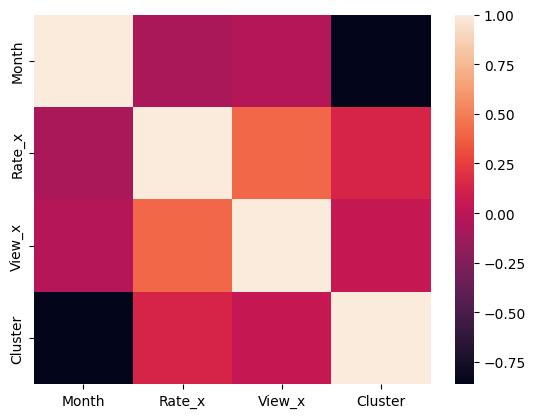

In [89]:
sns.heatmap(df_ff1.corr()) #визуализация кореляции 

In [90]:
df_ff1.corr()['Cluster']

Month     -0.861893
Rate_x     0.130551
View_x     0.042148
Cluster    1.000000
Name: Cluster, dtype: float64

Text(0, 0.5, 'Correlation with Cluster')

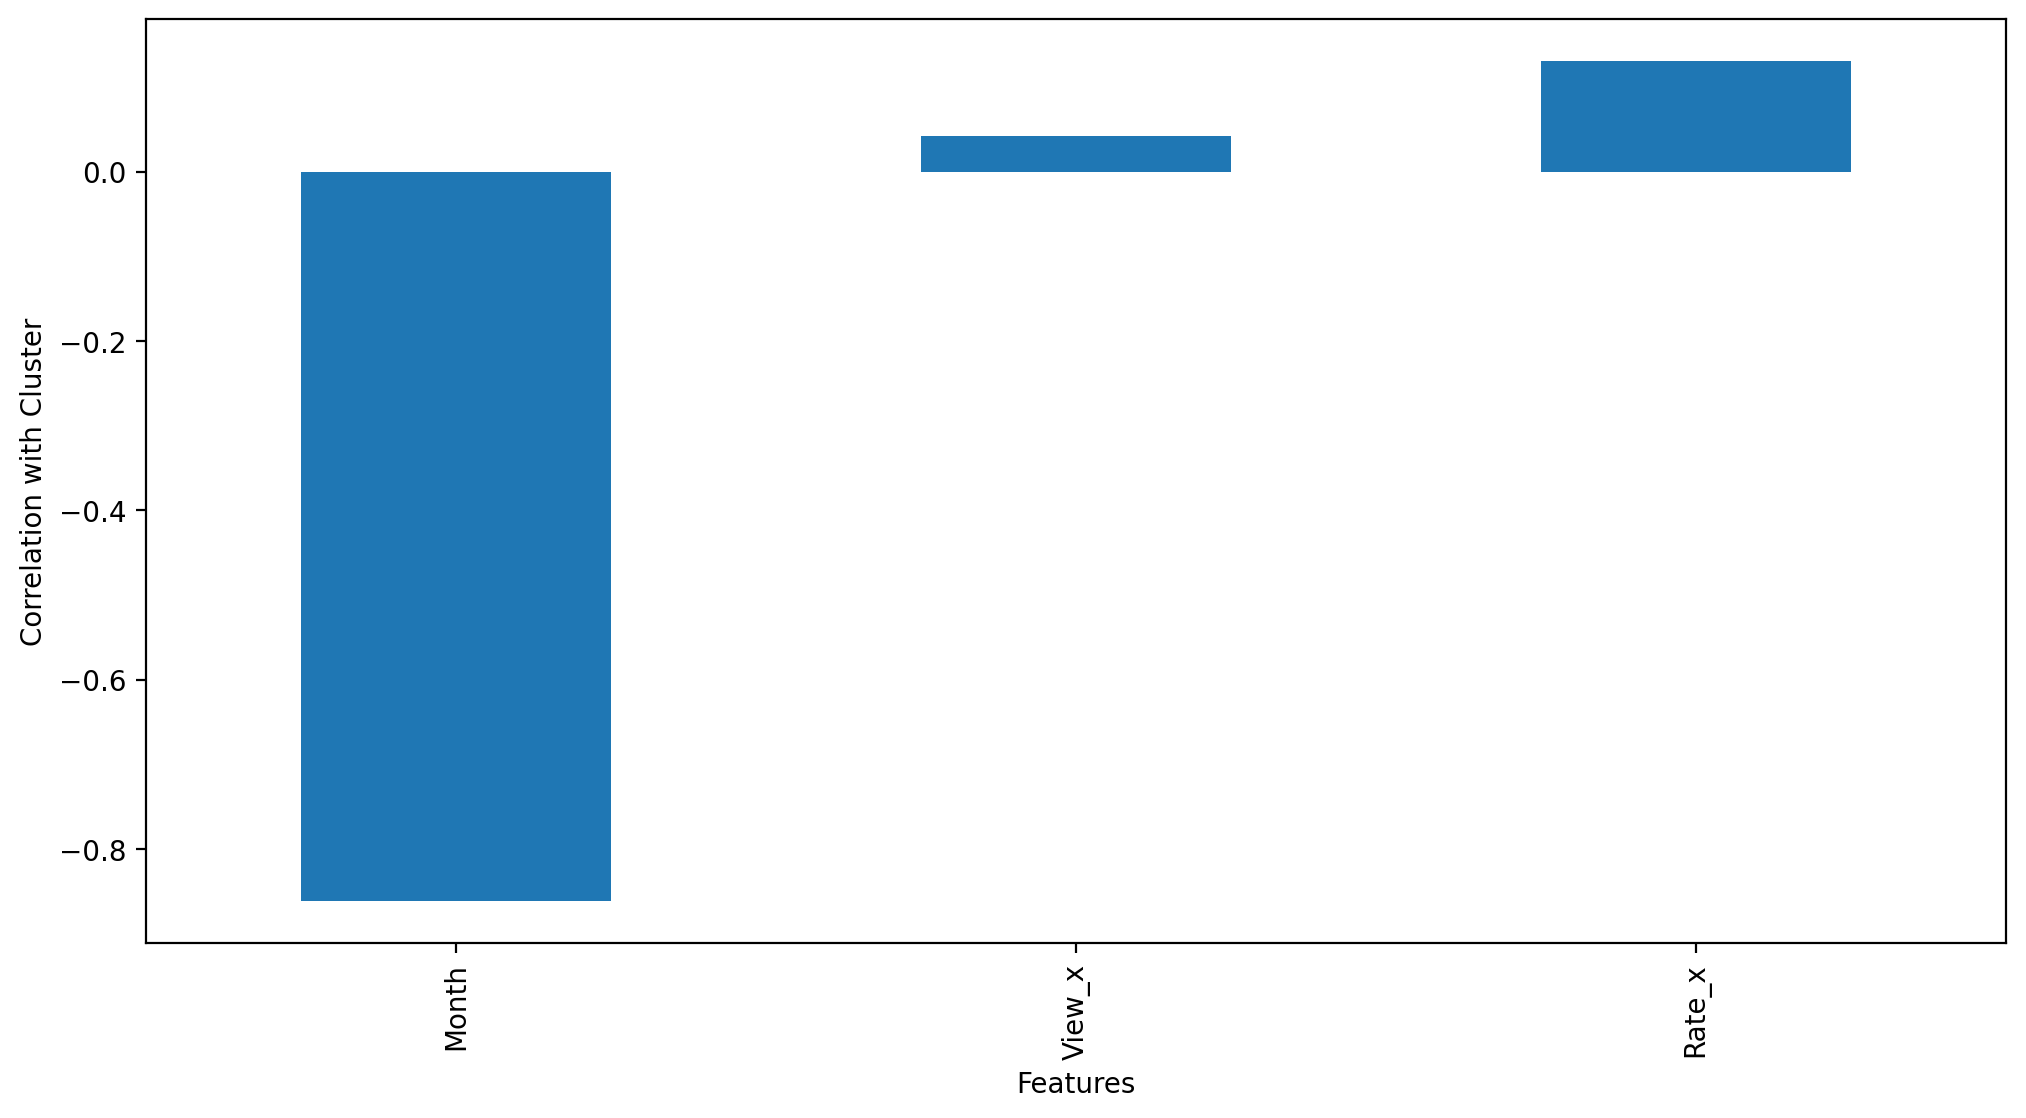

In [91]:

plt.figure(figsize=(12, 6), dpi=200)
df_ff1.corr()['Cluster'].iloc[:-1].sort_values().plot(kind='bar')  #cоздание и отображение столбчатой диаграммы корреляции
plt.xlabel("Features")
plt.ylabel("Correlation with Cluster")


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-p

Text(0, 0.5, 'Sum of Squared Distances')

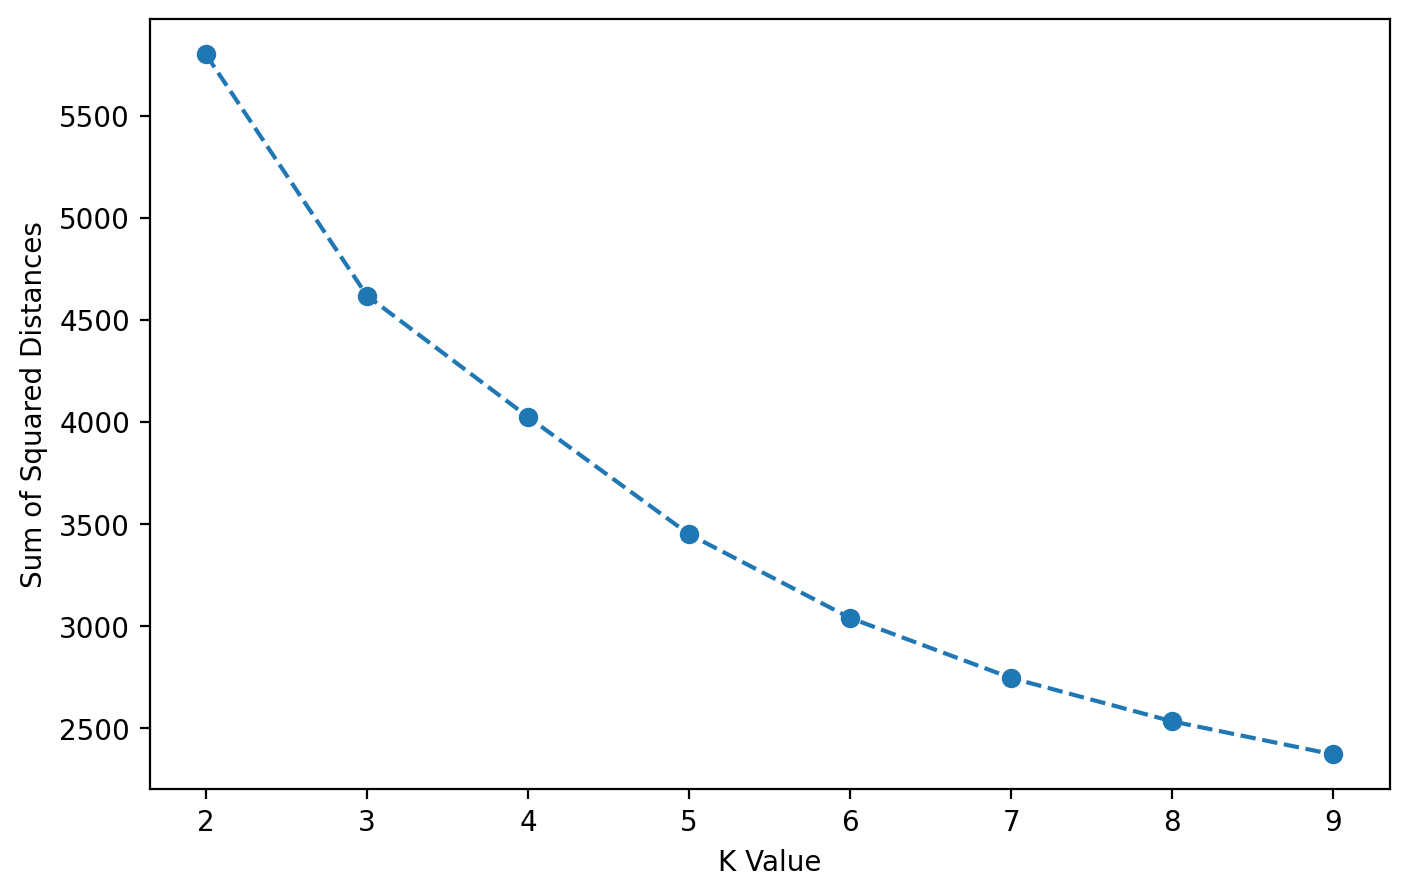

In [92]:
ssd = []  #получаем данные для их экранизации путем разных количеств кластеров
for k in range(2, 10): #проганяем  по количеству кластеров, до 10 
    model = KMeans(n_clusters=k)
    model.fit(scaled_X)
    ssd.append(model.inertia_) #добавляем результат в масиив

plt.figure(figsize=(8, 5), dpi=200)
plt.plot(range(2, 10), ssd, 'o--')
plt.xlabel("K Value")
plt.ylabel("Sum of Squared Distances")

In [93]:
ssd #ssqd

[5800.915262910631,
 4618.977865314191,
 4024.570584413481,
 3449.678280215752,
 3039.5203849549125,
 2745.196145474143,
 2532.7200033664935,
 2370.4846790148927]

Text(0, 0.5, 'Difference in SSQD')

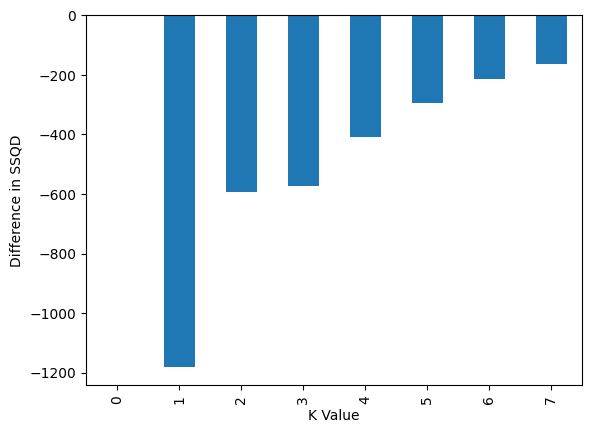

In [94]:
pd.Series(ssd).diff().plot(kind='bar') #расчет и визуализация разницы между последовательными значениями SSQD
plt.xlabel("K Value")
plt.ylabel("Difference in SSQD")

In [95]:
from nltk.tokenize import ToktokTokenizer
# Токенизация текстового столбца 'Title' с использованием библиотеки NLTK
tknzr = ToktokTokenizer()
df_ff['Title'] = df_ff['Title'].apply(lambda x: tknzr.tokenize(x))

In [102]:
# Фильтрация строк в DataFrame 'all1', оставляя только те, где столбец 'Firm' не содержит пропущенных значений
all1 = df_ff[df_ff['Firm'].notna()]

In [103]:
# Вывод DataFrame 'all1' после всех преобразований
df_ff

,Title,Day,Month,Time,Rate_x,View_x,Firm,Rate_y,View_y,Category
0,"[декабря, состоялась, церемония, награждения, ...",8,декабря,09:30,6,2300,Гэллэри Сервис,NaN,NaN,NaN
1,"[согласно, информации, издания, рбк, марта, го...",24,марта,14:30,10,5900,Гэллэри Сервис,NaN,NaN,NaN
2,"[июня, в, москве, прошл, на, этой, неформально...",31,мая,14:37,21,1600,Гэллэри Сервис,NaN,NaN,NaN
3,"[дайджест, собирает, свежие, статьи, по, дизай...",7,мая,16:09,24,5400,Гэллэри Сервис,NaN,NaN,NaN
4,"[по, статистике, из, более, чем, государственн...",23,декабря,03:06,16,8900,Гэллэри Сервис,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
1107,"[привет, хабр, такое, понятие, как, глубокое, ...",22,ноября,11:03,14,11000,Проект по использованию технологий компьютерн...,NaN,NaN,NaN
1108,"[перевод, поста, филиппа, ходжетта, выступавше...",6,июня,12:27,4,7800,Проект по использованию технологий компьютерн...,NaN,NaN,NaN
1109,"[никто, не, понимает, как, работают, самые, пе...",7,мая,20:05,35,57000,Проект по использованию технологий компьютерн...,NaN,NaN,NaN
1110,"[предположим, вы, хотите, создать, приложение,...",20,октября,12:39,10,15000,Проект по использованию технологий компьютерн...,NaN,NaN,NaN
